In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
"""
使用pytorch 实现反向传播， 利用的模型是 y = w * x
"""

'\n利用梯度下降法\n使用随机梯度下降，并加入mini-batch\n'

In [12]:
input = np.loadtxt("data.txt",delimiter=',')
print(input)

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]]


In [14]:
n_row = input.shape[0]


In [20]:
# init w with torch.tensor 
X = input[:, 0:-1]
Y = input[:, -1]



In [27]:
def forward(w, x):
    return w * torch.from_numpy(x)

def loss(y_pred, y):
    return (y_pred - y) ** 2

In [46]:
# 设定训练值
epoch = 20
cost_sum = np.zeros(epoch)
alpha = 0.01


In [47]:
# 构造神经网络
w = torch.tensor([1.0])
w.requires_grad = True
for i in range(0, epoch):
    temp_cost = 0
    for x, y in zip(X, Y):
        y_pred = forward(w, x)
        
        cost = loss(y_pred, y)
        #print(f"cost={cost.data}")
        cost.backward()
        w.data = w.data - alpha * w.grad.data
        w.grad.data.zero_()
        #print("cost", cost.item())
        temp_cost += cost.item()
        
    cost_sum[i] = temp_cost
   

cost 1.0
cost 3.8416001495361343
cost 7.315943092621765
cost 8.745316980912548
cost 6.318490559823786
cost 2.2746576802828713
cost 0.0049536929071933855
cost 0.01903012114377134
cost 0.03624099538548364
cost 0.04332162097944092
cost 0.031299947082530366
cost 0.011268056874769172
cost 2.453956007286706e-05
cost 9.427163695363561e-05
cost 0.00017953013872329393
cost 0.00021460466177813942
cost 0.000155052461892069
cost 5.582423023042793e-05
cost 1.2158274387275014e-07
cost 4.6690934141224716e-07
cost 8.893710088386797e-07
cost 1.0628000381984748e-06
cost 7.677058988520002e-07
cost 2.763741235867201e-07
cost 6.030518306943122e-10
cost 2.3194388631964102e-09
cost 4.424748567544157e-09
cost 5.322590368450619e-09
cost 3.842615114990622e-09
cost 1.3833414413966238e-09
cost 3.197442310920451e-12
cost 1.2789769243681803e-11
cost 2.5067947717616335e-11
cost 2.751221472863108e-11
cost 1.7408297026122455e-11
cost 8.185452315956354e-12
cost 1.4210854715202004e-14
cost 5.684341886080802e-14
cost 1.2

In [51]:
cost_sum


array([2.94960085e+01, 1.46114434e-01, 7.23822690e-04, 3.58474315e-06,
       1.78957862e-08, 9.41611233e-11, 7.81597009e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
x_train = np.arange(epoch)
print(cost_sum.shape, x_train.shape)


Text(0, 0.5, 'cost')

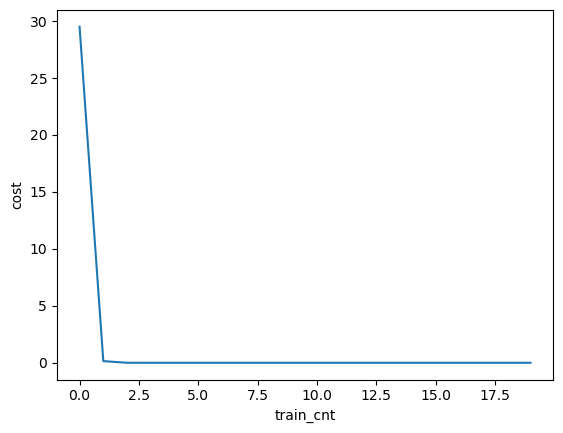

In [49]:
plt.plot(x_train, cost_sum)
plt.xlabel("train_cnt")
plt.ylabel("cost")